Makine öğrenmesi sonucunda elde ettiğimiz tahmin yani çıktı kategorik ise classification denir.
Eğer elde ettiğimiz çıktı numeric ise regresyon denir.
Benzer gözlemleri aynı kümeye atamaya ise Clustering denir.

### Regresyon : 

İki veya daha fazla değişken arasında ki ilişkiyi inceler. Korelasyon katsayısı gibi inceler. 

Linear Regresyon ise 1 tane bağımsız 1 tane de bağımlı değişken arasında ki ilişkiyi inceler. Tek değerli bağımsız değişken olmak zorundadır.

Örneğin : Evin metrekaresi arttıkça evin fiyatınında artması. arasında doğrusal bir ilişki vardır. Kuvvetli bir korelasyon ilişkisi vardır. Doğrusal olmasının sebebi istikrarlı bir şekilde biri artınca diğerininde artması.

Y = ax + b şeklinde normal denklem ile çözülür.
MSE = ((Y - Yİ)**2)n
hata payı = MSE ** 0.5

### TEORİ OLARAK LİNEAR REGRESYON ÇÖZÜMÜ : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("linearregression.csv", sep=";")
df

,alan,fiyat
0,120,870000
1,140,890000
2,185,1000000
3,210,1200000
4,235,1225000
5,245,1500000
6,100,680000
7,110,725000


 Burda 2 tane değişken var. biri alan tablosu, biri fiyatlar. fiyatlar burda bağımlı değişkendir. çünkü alan miktarı arttıkça veya azaldıkça fiyatlarda da azalış veya artış olmaktadır. Alan ise bağımsız bir değişkendir. Burda 1 tane bağımsız değikenimiz var. Ve aralarında pozitif yönlü doğrusal bir ilişki var. Grafiğe bakarak gözlemleyelim.

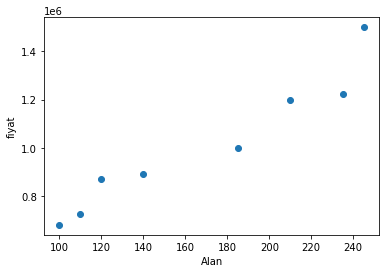

In [18]:
plt.xlabel("Alan")
plt.ylabel("fiyat")
plt.scatter("alan", "fiyat", data=df, marker="o")
plt.show()

Grafikte de görüldüğü üzere aralarında pozitif yönlü doğrusal bir ilişki var.

Teori de linear regresyonda ilk önce bağımlı ve bağımsız değikenleri normal denklemine çevirmemiz gerekir.

 df dataframemiz de ki alan ve fiyat arasında ki regresyon katsayılarını denklemini hata karelerini bulalım : 

In [23]:
# ilk önce alan tablosun da ki tüm değerlerin toplamını buluruz.
alan_toplam = df["alan"].sum()
# sonra bağımsız değişkenimiz olan fiyat tablosun da ki tüm değerlerin toplamını buluruz.
fiyat_toplam = df["fiyat"].sum()
# sonra alan ve fiyat tablosun daki her değeri kendi eşleniği ile çarpıp çıkan sonuçları toplarız.
alan_fiyat_carpım = (df["alan"]*df["fiyat"]).sum()
# sonra bağımsız değişken olan alan tablosunun her bir değerinin karelri alınıp tüm değerler toplanır.
alan_kare_toplam = (df["alan"]**2).sum()
print("Alan değişken değerlerinin toplamı = ", int(alan_toplam))
print("Fiyat değişken değerlerinin toplamı = ", int(fiyat_toplam))
print("Alan ve Fiyat değişken değerlerinin çarpımlarının toplamı = ", int(alan_fiyat_carpım))
print("Alan değişken  karelerinin toplamı = ", int(alan_kare_toplam))

Alan değişken değerlerinin toplamı =  1345
Fiyat değişken değerlerinin toplamı =  8090000
Alan ve Fiyat değişken değerlerinin çarpımlarının toplamı =  1469125000
Alan değişken  karelerinin toplamı =  249675


sonra normal denklemi kurarız : 

ilk olarak bağımsız değişkenin eleman sayılarını buluruz.

n = len(df["alan"])

fiyat_toplam = a*n + b*alan_toplam

alan_fiyat_carpım = a*alan_toplam + b *alan_kare_toplam

yaptığımız işlem sonucunda : 

8090000 = 8a + 1345b

1469125000 = 1345a + 249675b 

şeklinde 2 bilinmeyenli bir denklem elde ederiz. burda normal 2 bilinmeyenli denklem çözümü uygulanır ve a,b değerleri bulunur.

In [33]:
x = np.array([[8,1345],[1345,249675]])
y = np.array([8090000,1469125000])
a , b = np.linalg.solve(x,y)
a = int(a)
b = int(b)+1
print("normal denklemin a değeri = ", a ,"b değeri = ", b)

normal denklemin a değeri =  233033 b değeri =  4629


Y = 233033+4629X 

denklemini elde ettik. Şimdi X yerine alan değişkenin de bulunan her bir değeri sırayla vereceğiz. bakalım tahmini değerlerimiz nasıl çıkacak.

In [34]:
df["fiyat_tahmin"] = 233033 + (4629 * df["alan"])
df

,alan,fiyat,fiyat_tahmin
0,120,870000,788513
1,140,890000,881093
2,185,1000000,1089398
3,210,1200000,1205123
4,235,1225000,1320848
5,245,1500000,1367138
6,100,680000,695933
7,110,725000,742223


 görüldüğü üzere tahmin değerlerimiz yukarıda geldi. şimdi yaptığımız işlemin hata payını bulalım...

In [37]:
# fiyat değerlerinden tahmin değerlerinin her bir değerini çıkarıp sonuçların karelerini alıp toplarız.
((df["fiyat"]-df["fiyat_tahmin"])**2).sum()

42127355717

In [39]:
# sonrasında yukarıda bulduğumuz değeri alan değişkeninin eleman sayısına böleriz ve sonucun karekökünü alırız.
# eğer n < 30 ise n-2 değerine böleriz .
MSE = (42127355717/(8-2)) ** 0.5
MSE = round(MSE)
MSE 
# bulduğumuz hata 83 bin tl dir.

83793

### PYTHON İLE YAPALIM : 

In [41]:
from sklearn import linear_model
# sklearn kütüphanesinden linear model fonksiyonunu import ettik.

In [43]:
reg = linear_model.LinearRegression()
# sonrasında reg adlı bir değişken tanımlayıp modeli Liner_Regresyon fonksiyon özelliklerini atadım.

In [44]:
reg.fit(df[["alan"]], df["fiyat"])
# fit ederek maiknaya dataframe de ki değişkenler arasında ki ilişkiyi öğrettim.

LinearRegression()

In [45]:
reg.predict(df[["alan"]])
# predict yaparak alan değişkenlerini vererek fiyat tahminleri yaptırdım. ama burda array olarak vermiş bunu df e atalım.

array([ 788489.05109489,  881065.02986065, 1089360.98208361,
       1205080.95554081, 1320800.92899801, 1367088.91838089,
        695913.07232913,  742201.06171201])

In [56]:
fiyat_tahmin = list (reg.predict(df[["alan"]]))
fiyat_tahmin_2 = []
for i in fiyat_tahmin : 
    fiyat_tahmin_2.append(int(i))
fiyat_tahmin_2
# bunu bu şekilde yapmamızın sebebi numpy arrayi int yapamıyoruz. e li değerler çıkıyor. daha iyi analiz etmek için listeye 
# int yaptık.

[788489, 881065, 1089360, 1205080, 1320800, 1367088, 695913, 742201]

In [57]:
df["fiyat_tahmin"] = fiyat_tahmin_2
df

,alan,fiyat,fiyat_tahmin
0,120,870000,788489
1,140,890000,881065
2,185,1000000,1089360
3,210,1200000,1205080
4,235,1225000,1320800
5,245,1500000,1367088
6,100,680000,695913
7,110,725000,742201


In [60]:
# bunun da MSE DEĞERİNİ bulalım.
MSE = ((df["fiyat"] - df["fiyat_tahmin"])**2).sum() / (8-2)
MSE = MSE **0.5
MSE = int(MSE)
MSE 
# 83 binlik bir hatamız çıktı. yukarı da aynı sonucu bulmuştuk.

83792

In [62]:
b = reg.coef_
b = int(b)
b
# coef katsayıdır. yani b katsayısı.

4628

In [63]:
a = reg.intercept_
a = int(a)
a
# a değeri de normal denklemdeki toplama sayısıdır.

233033

In [65]:
# 110 metrekare için tahmin de bulunalım.
reg.predict([[110]])

array([742201.06171201])

In [66]:
# 220 metrekare için tahminde bulunalım .
reg.predict([[220]])

array([1251368.94492369])

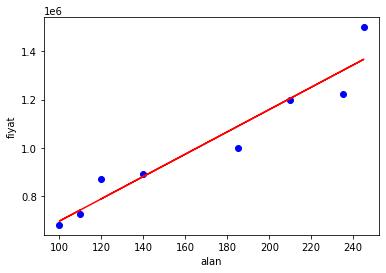

In [67]:
plt.xlabel("alan")
plt.ylabel("fiyat")
plt.scatter(df.alan, df.fiyat, marker="o", color="blue")
plt.plot(df.alan, reg.predict(df[["alan"]]), color="red")
plt.show()
# tahmin ile gerçek değer arasında ki farkı görmek istersek grafik üzerinde.
# modelimiz kırmızı gerçek değerimiz mavi.